# Part II - FordGoBike Dataset
## by Catarina Durán

## Investigation Overview

The data being explored includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The focus is understanding when are most trips taken in terms of time of the day, day of the week and month of the year. Also, what variables affect the duration of users rides.


## Dataset Overview

Two different dataframes were created: one that only includes trip data for the month of February 2019, and other that includes trip data for all the months of 2019. The original given data for February 2019 includes more variables than the rest of the data for the other months.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_pickle('data/201902-fordgobike-tripdata-clean.pkl')
df_allyear=pd.read_pickle('data/2019-fordgobike-tripdata-clean.pkl')

In [3]:
#Choose the base color for the plots produced on this document
base_color = sb.color_palette()[0]

In [4]:
#For the categorical ordinal variables, choose the order of categories
order_dayofweek=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_month=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                    'August', 'September','November','December']

>Note that the above cells have been set as "Skip"-type slides. That means that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Rides

In this first part of the presentation I want to focus on the subscriber/users habits: when are most trips taken in terms of time of the day, day of the week and month of the year.

 During weekdays, the busy hours (when more trips are taken) overlap the business hours; this might mean that users use the bike sharing system to go to work and to come back home. During weekends, the use of this system is normally distributed along the day, meaning that people use it more from late morning to early afternoon.

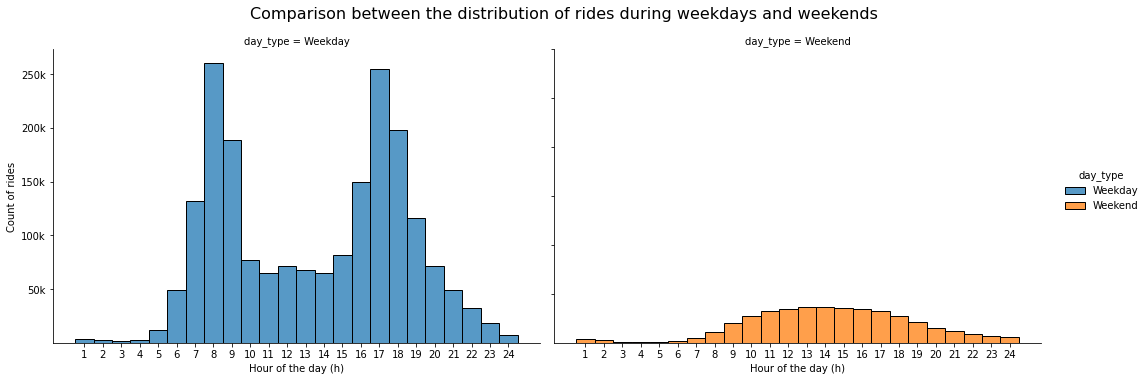

In [18]:
#Plot the distribution of the count of rides along the hours of the weekdays and weekends, comparison
bin_edges = np.arange(0.5, 24.5+1, 1)
ticks = np.arange(1, 24+1, 1)
labels = ['{}'.format(val) for val in ticks]


g=sb.displot(x='time', data=df_allyear, hue='day_type', col='day_type',bins = bin_edges, height=5, aspect=1.5)

g.set_axis_labels('Hour of the day (h)', 'Count of rides')

plt.xticks(ticks,labels)
plt.yticks([50000, 1e5, 1.5e5, 2e5, 2.5e5, 3e5], ['50k', '100k', '150k', '200k', '250k', '300k'])

plt.suptitle('Comparison between the distribution of rides during weekdays and weekends', y=1.05, fontsize=16)

plt.show();

This plot shows the distribution of rides between the different days of the week. We can state that there are no major differences between the weekdays. On the other hand, there is an accentuated drop in rides comparing weekdays and wekends. The day of the week with less recorded rides is Sunday.

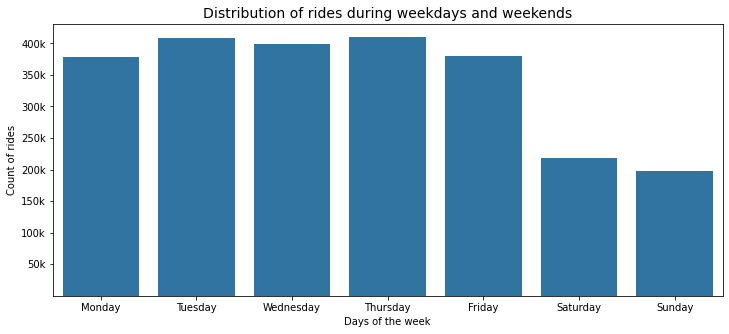

In [21]:
#Plot the count of trips for each day of the week

plt.figure(figsize = [12, 5])

sb.countplot(data=df_allyear,x='day',color=base_color, 
             order=order_dayofweek)
plt.xlabel('Days of the week')
plt.ylabel('Count of rides')

plt.yticks([50000, 1e5, 1.5e5, 2e5, 2.5e5, 3e5,3.5e5,4e5], ['50k', '100k', '150k', '200k', '250k', '300k','350k','400k'])

plt.title('Distribution of rides during weekdays and weekends', fontsize=14)

plt.show();

The next graphic shows how the number of rides differed along the year of 2019.

- The month for which more rides were recorded was March, with more that 250k rides.
- We can see that there is a slight bimodal distribution with a peak in March and other in September. After some reaserch, I found out that the months with higher temperatures are actually during Fall (September-November), which explains the high number of rides during it. [San Francisco Weather].
- On the other hand, I did not found a plausible reason for march being the month with more trips recorded that year.

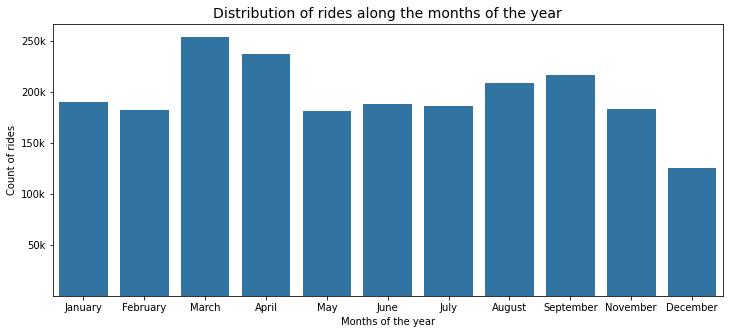

In [22]:
#Plot the count of trips for each month of the year 2019
plt.figure(figsize = [12, 5])

sb.countplot(data=df_allyear,x='month',color=base_color, 
             order=order_month)
plt.xlabel('Months of the year')
plt.ylabel('Count of rides')

plt.yticks([50000, 1e5, 1.5e5, 2e5, 2.5e5], ['50k', '100k', '150k', '200k', '250k'])

plt.title('Distribution of rides along the months of the year', fontsize=14)

plt.show();

## What variables affect the time users take on their rides?

In this second part of the presentation, the variables possibly affecting the time that users take on their rides will be explored.

From the next plot we could take some insights:

- The average trip duration is generally higher on weekends, comparing to weekdays. This is true for all the months of the year.
- The months for which users make longer rides are from June till September.
- The months for which users make shorter rides are February, November and December.

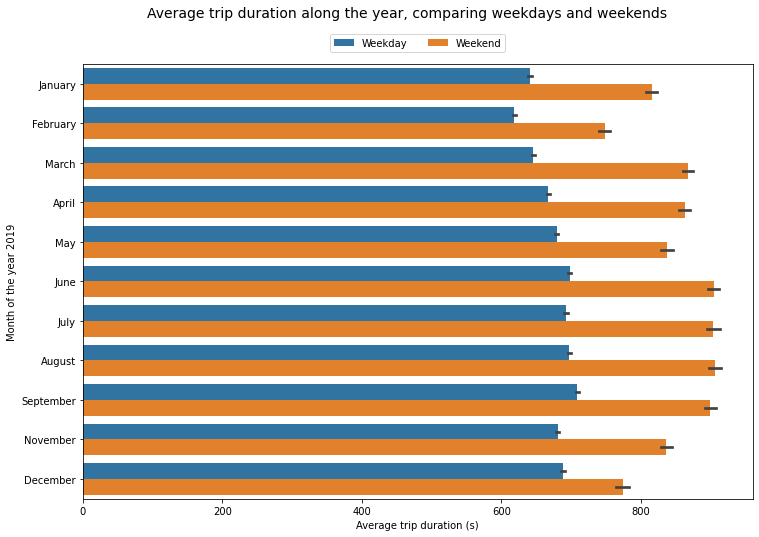

In [23]:
#Plot the duration of trips along the month of the year for weekdays and weekends
plt.figure(figsize = [12, 8])

ax = sb.barplot(data = df_allyear, y = 'month', x = 'duration_sec', hue = 'day_type', order=order_month)

ax.legend(loc="upper center", # "upper center" puts it below the line
    ncol=2,
    bbox_to_anchor=(0.5, 1.08))

plt.xlabel('Average trip duration (s)')
plt.ylabel('Month of the year 2019')

plt.suptitle('Average trip duration along the year, comparing weekdays and weekends',fontsize=14)

plt.show();

The next plot suggests that, on average, costumers make longer rides than subscribers.

Although Female Costumers are the ones making, on average, the longest rides, Female and Male members, do not face major differences on the average duration of rides (less than 2 minutes)

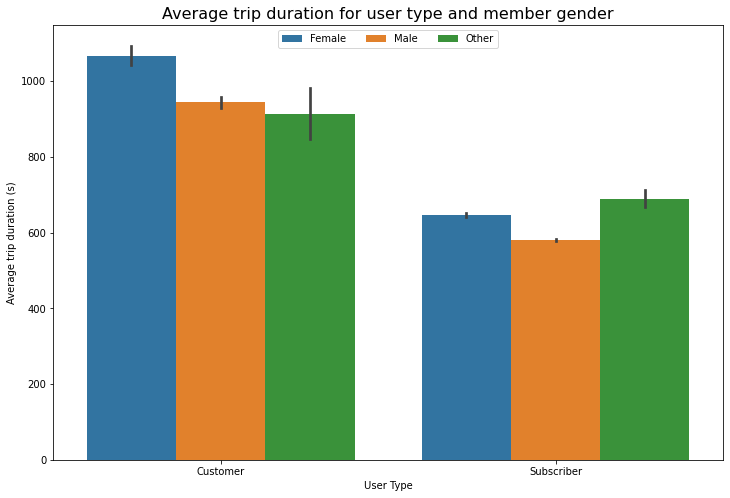

In [24]:
#Plot the duration of trips along the month of the year for weekdays and weekends
plt.figure(figsize = [12, 8])

ax = sb.barplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'member_gender')

ax.legend(loc="upper center", # "upper center" puts it below the line
    ncol=3)

plt.xlabel('User Type')
plt.ylabel('Average trip duration (s)')

plt.title('Average trip duration for user type and member gender', fontsize=16)

plt.show();

Thank you for your attention!

# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt